In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# excercise with help of resources from Manuel Amunategui - https://github.com/amunategui

### Create dataframe (^GSPC)

In [2]:
sp_500_df = pd.read_csv('^GSPC.csv')
sp_500_df['Date'] = pd.to_datetime(sp_500_df['Date'])
sp_500_df = sp_500_df.sort_values('Date', ascending=True)
sp_500_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23138,2020-02-13,3365.899902,3385.090088,3360.520020,3373.939941,3373.939941,3498240000
23139,2020-02-14,3378.080078,3380.689941,3366.149902,3380.159912,3380.159912,3398040000
23140,2020-02-18,3369.040039,3375.010010,3355.610107,3370.290039,3370.290039,3746720000
23141,2020-02-19,3380.389893,3393.520020,3378.830078,3386.149902,3386.149902,3600150000
23142,2020-02-20,3380.449951,3389.149902,3341.020020,3373.229980,3373.229980,4007320000


### Plot S&P 500 

Text(0.5, 1.0, 'S&P 500')

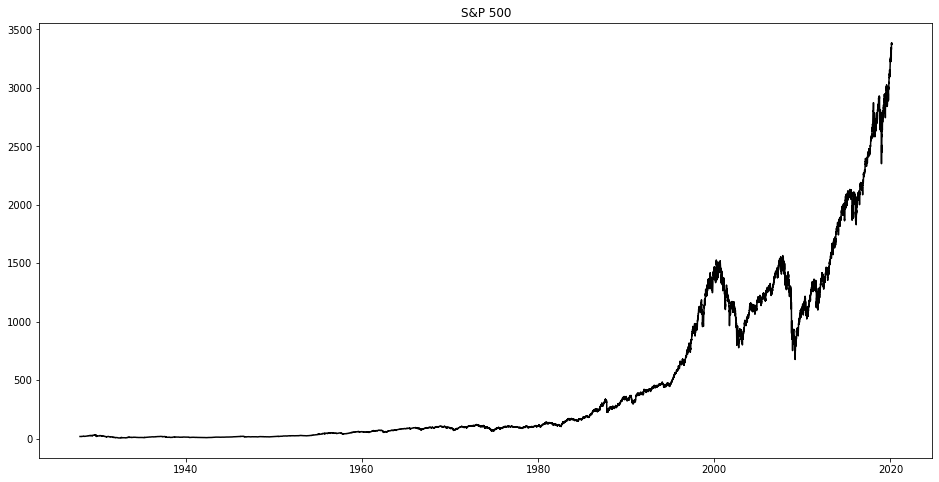

In [3]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sp_500_df['Date'], sp_500_df['Adj Close'], color='black')
plt.title('S&P 500')

### Create dataframe (^VIX)

In [4]:
vix_df = pd.read_csv('^VIX.csv')
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
vix_df = vix_df.sort_values('Date', ascending=True)
vix_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7588,2020-02-13,14.43,15.440000,14.00,14.15,14.15,0
7589,2020-02-14,14.12,14.540000,13.38,13.68,13.68,0
7590,2020-02-18,14.98,15.490000,14.53,14.83,14.83,0
7591,2020-02-19,14.66,14.740000,14.21,14.38,14.38,0
7592,2020-02-20,14.54,17.209999,14.49,15.56,15.56,0


### Plot VIX

Text(0.5, 1.0, 'VIX')

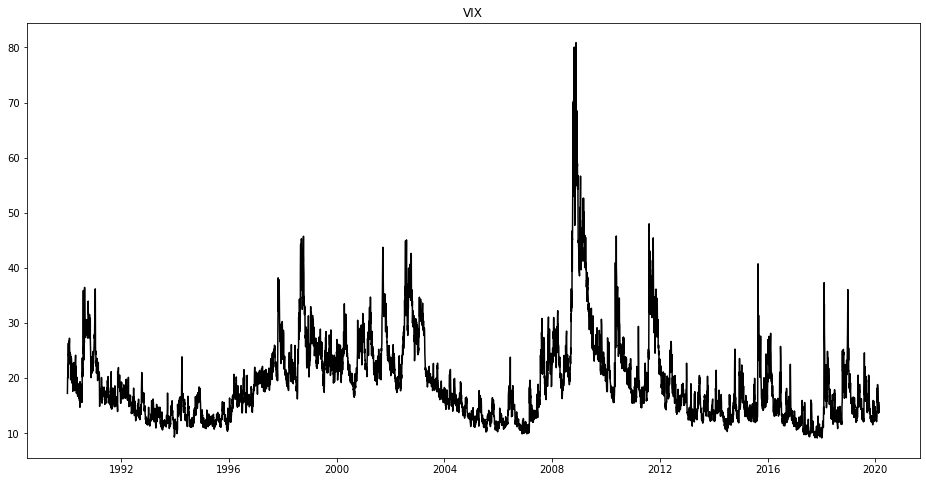

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(vix_df['Date'], vix_df['Adj Close'], color='black')
plt.title('VIX')

### Create dataframe (^RUT)

In [6]:
rut_df = pd.read_csv('^RUT.csv')
rut_df['Date'] = pd.to_datetime(rut_df['Date'])
rut_df = rut_df.sort_values('Date', ascending=True)
rut_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8172,2020-02-13,1684.579956,1696.540039,1680.380005,1693.739990,1693.739990,34982400
8173,2020-02-14,1694.869995,1695.170044,1683.469971,1687.579956,1687.579956,33980400
8174,2020-02-18,1686.030029,1687.380005,1674.599976,1683.520020,1683.520020,37467200
8175,2020-02-19,1685.329956,1698.160034,1685.329956,1692.569946,1692.569946,36001500
8176,2020-02-20,1689.420044,1698.910034,1677.619995,1696.069946,1696.069946,40073200


### Plot Russell 2000

Text(0.5, 1.0, 'RUT2000')

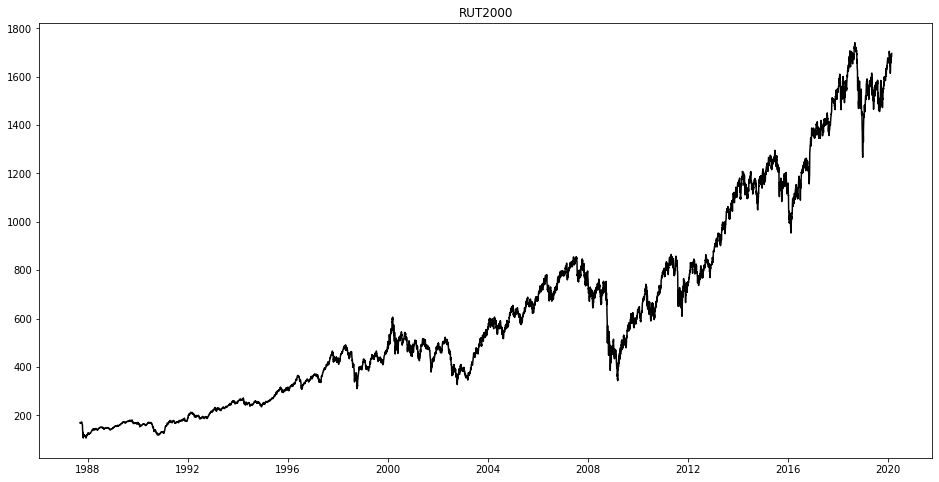

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(rut_df['Date'], rut_df['Adj Close'], color='black')
plt.title('RUT2000')

### Checking date ranges

In [8]:
print('SP500: ', min(sp_500_df['Date']), max(sp_500_df['Date']))
print('VIX: ', min(vix_df['Date']), max(vix_df['Date']))
print('RUT2000: ', min(rut_df['Date']), max(rut_df['Date']))

SP500:  1927-12-30 00:00:00 2020-02-20 00:00:00
VIX:  1990-01-02 00:00:00 2020-02-20 00:00:00
RUT2000:  1987-09-10 00:00:00 2020-02-20 00:00:00


In [9]:
start_date = '1990-01-02'

sp_500_df = sp_500_df[sp_500_df['Date'] >= start_date]
vix_df = vix_df[vix_df['Date'] >= start_date]
rut_df = rut_df[rut_df['Date'] >= start_date]

### Plot SP500 with VIX

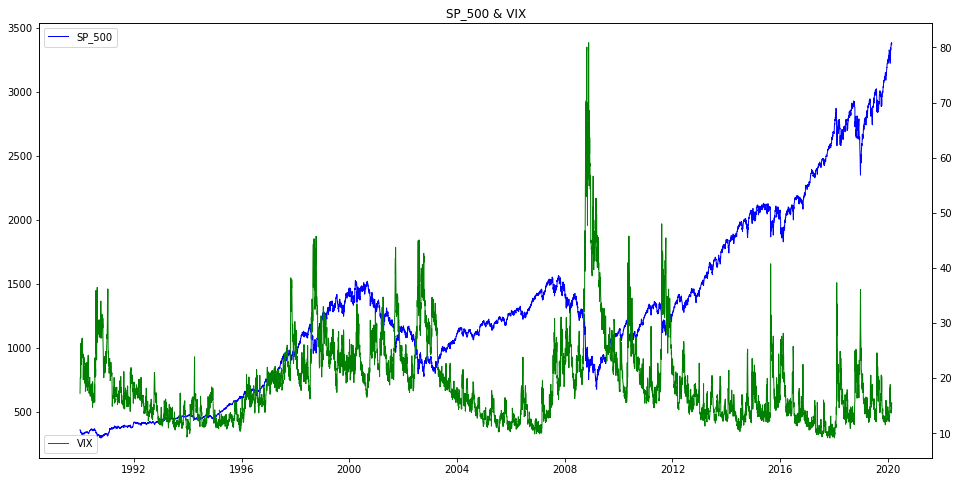

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(sp_500_df['Date'], sp_500_df['Adj Close'], linewidth=1, label='SP_500', color='blue')
plt.title('SP_500 & VIX')
plt.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_df['Date'], vix_df['Adj Close'], linewidth=1, label='VIX', color='green')
ax2.legend(loc='lower left')

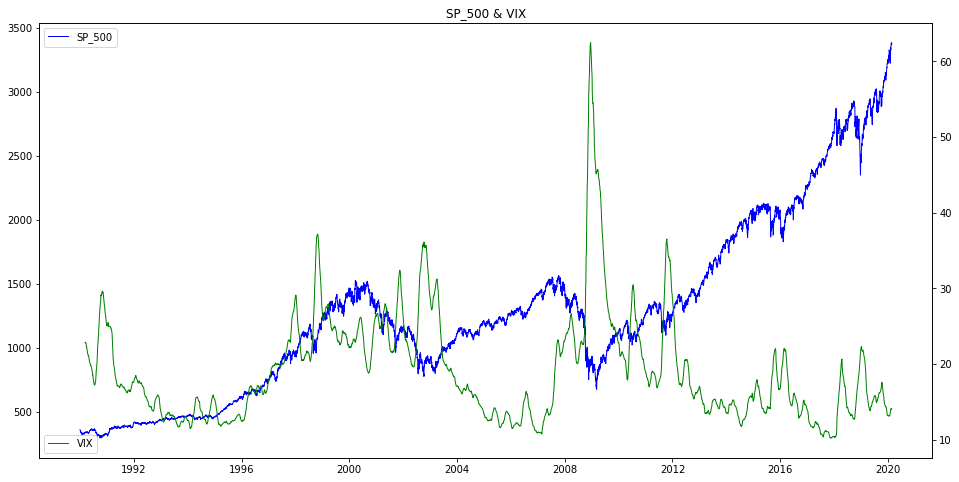

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(sp_500_df['Date'], 
         sp_500_df['Adj Close'], 
         linewidth=1, label='SP_500',
         color='blue')
plt.title('SP_500 & VIX')
plt.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_df['Date'], 
         vix_df['Adj Close'].rolling(window=50).mean().values, 
         linewidth=1, 
         label='VIX', 
         color='green')
ax2.legend(loc='lower left')

### Merging dataframes after the same date

In [12]:
sp_500_df = sp_500_df[['Date', 'Adj Close']]
sp_500_df.columns = ['Date', 'sp_500_close']

rut_df = rut_df[['Date', 'Adj Close']]
rut_df.columns = ['Date', 'rus_2000_close']

merged_df = pd.merge(sp_500_df, 
                     rut_df, 
                     on=['Date'], 
                     how='left')

merged_df = merged_df.fillna(method='ffill')
merged_df = merged_df.dropna(axis=0)
merged_df.head()

,Date,sp_500_close,rus_2000_close
0,1990-01-02,359.690002,169.949997
1,1990-01-03,358.760010,170.789993
2,1990-01-04,355.670013,170.089996
3,1990-01-05,352.200012,169.649994
4,1990-01-08,353.790009,169.550003


In [13]:
sp_500_df.columns

Index(['Date', 'sp_500_close'], dtype='object')

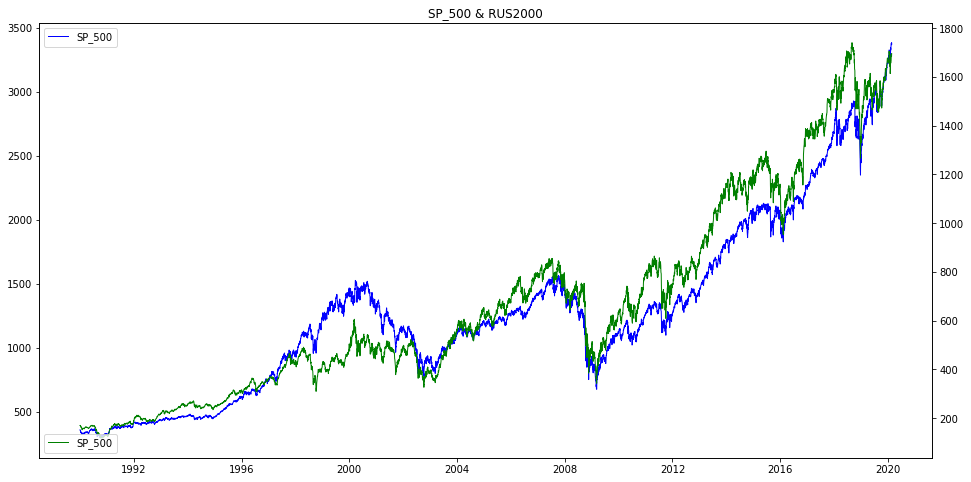

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(merged_df['Date'], 
         merged_df['sp_500_close'], 
         linewidth=1, label='SP_500',
         color='blue')

plt.title('SP_500 & RUS2000')
plt.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(merged_df['Date'], 
         merged_df['rus_2000_close'], 
         linewidth=1, label='SP_500',
         color='green')
plt.legend(loc='lower left')

In [15]:
merged_df['sp_500_close_pct'] = merged_df['sp_500_close'].pct_change()
merged_df['rus_2000_close_pct'] = merged_df['rus_2000_close'].pct_change()

In [16]:
merged_df.head()

,Date,sp_500_close,rus_2000_close,sp_500_close_pct,rus_2000_close_pct
0,1990-01-02,359.690002,169.949997,NaN,NaN
1,1990-01-03,358.760010,170.789993,-0.002586,0.004943
2,1990-01-04,355.670013,170.089996,-0.008613,-0.004099
3,1990-01-05,352.200012,169.649994,-0.009756,-0.002587
4,1990-01-08,353.790009,169.550003,0.004514,-0.000589


### Compare percentage change for both indexes

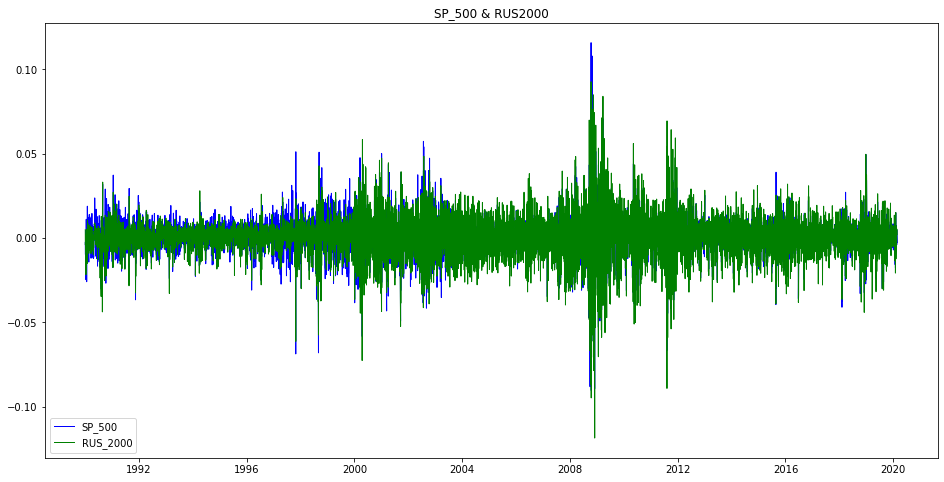

In [17]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(merged_df['Date'], 
         merged_df['sp_500_close_pct'], 
         linewidth=1, label='SP_500',
         color='blue')

plt.title('SP_500 & RUS2000')
plt.legend(loc='upper left')

plt.plot(merged_df['Date'], 
         merged_df['rus_2000_close_pct'], 
         linewidth=1, label='RUS_2000',
         color='green')
plt.legend(loc='lower left')

In [18]:
merged_df['sp_500_close_cumsum'] = merged_df['sp_500_close_pct'].cumsum()
merged_df['rus_2000_close_cumsum'] = merged_df['rus_2000_close_pct'].cumsum()

In [19]:
merged_df.head()

,Date,sp_500_close,rus_2000_close,sp_500_close_pct,rus_2000_close_pct,sp_500_close_cumsum,rus_2000_close_cumsum
0,1990-01-02,359.690002,169.949997,NaN,NaN,NaN,NaN
1,1990-01-03,358.760010,170.789993,-0.002586,0.004943,-0.002586,0.004943
2,1990-01-04,355.670013,170.089996,-0.008613,-0.004099,-0.011199,0.000844
3,1990-01-05,352.200012,169.649994,-0.009756,-0.002587,-0.020955,-0.001743
4,1990-01-08,353.790009,169.550003,0.004514,-0.000589,-0.016440,-0.002332


### Plot after unification of the data 

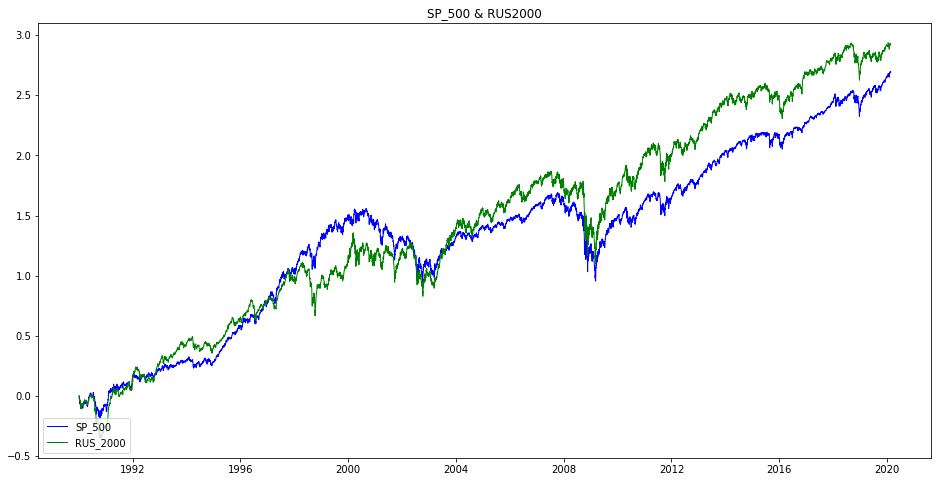

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(merged_df['Date'], 
         merged_df['sp_500_close_cumsum'], 
         linewidth=1, label='SP_500',
         color='blue')

plt.title('SP_500 & RUS2000')
plt.legend(loc='upper left')

plt.plot(merged_df['Date'], 
         merged_df['rus_2000_close_cumsum'], 
         linewidth=1, label='RUS_2000',
         color='green')
plt.legend(loc='lower left')

### Plotting with choosing start and end date 

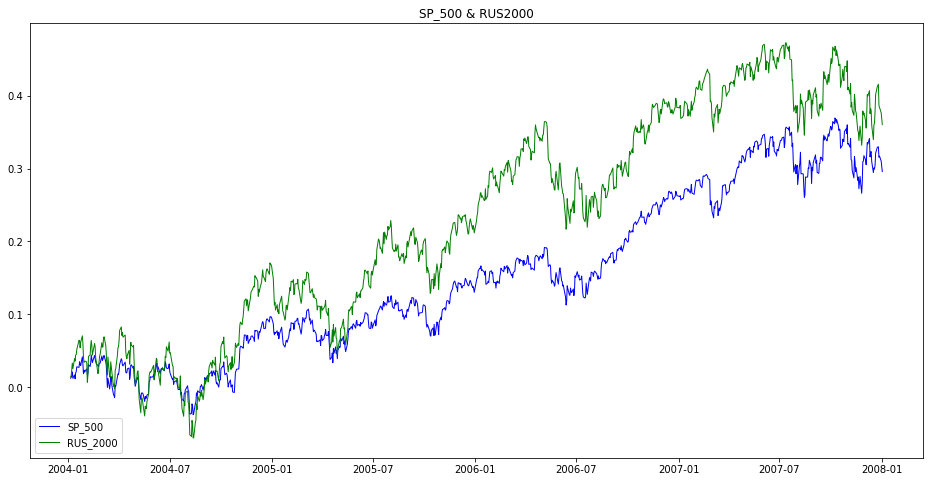

In [21]:
merged_df = pd.merge(sp_500_df, 
                     rut_df, 
                     on=['Date'], 
                     how='left')

merged_df = merged_df.fillna(method='ffill')
merged_df = merged_df.dropna(axis=0)

start_date = '2004-01-02'
end_date = '2008-01-02'

merged_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

merged_df['sp_500_close_pct'] = merged_df['sp_500_close'].pct_change()
merged_df['rus_2000_close_pct'] = merged_df['rus_2000_close'].pct_change()
merged_df['sp_500_close_cumsum'] = merged_df['sp_500_close_pct'].cumsum()
merged_df['rus_2000_close_cumsum'] = merged_df['rus_2000_close_pct'].cumsum()

fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(merged_df['Date'], 
         merged_df['sp_500_close_cumsum'], 
         linewidth=1, label='SP_500',
         color='blue')

plt.title('SP_500 & RUS2000')
plt.legend(loc='upper left')

plt.plot(merged_df['Date'], 
         merged_df['rus_2000_close_cumsum'], 
         linewidth=1, label='RUS_2000',
         color='green')
plt.legend(loc='lower left')